In [1]:
import pandas as pd
df= pd.read_csv("../data/datasets/model_data.csv", low_memory=False)

In [44]:

# Load the dataset from the text file
data_txt = "/home/yadasa/Desktop/InsuranceDataAnalysis/data/datasets/MachineLearningRating_v3.txt" 
df = pd.read_csv(data_txt, delimiter='|', low_memory=False)
# Save the dataset as a CSV file
data_csv = "/home/yadasa/Desktop/InsuranceDataAnalysis/data/datasets/model_data.csv"
df.to_csv(data_csv, index=False)

print(df.describe())
print(df.dtypes)

       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

In [9]:
from sklearn.preprocessing import LabelEncoder

# Replace missing values in 'Gender' column with 'NaN'
df['Gender'] = df['Gender'].fillna('NaN')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform 'Gender' column
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

# Print the mapping of categories to encoded values
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'Female': 0, 'Male': 1, 'NaN': 2, 'Not specified': 3}


In [10]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,Gender_encoded
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,3
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,3
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,3
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,3
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,3


In [11]:
gender_values = df['Gender'].value_counts()
print("Unique values of 'Gender' column:")
print(gender_values)

gender_values

Unique values of 'Gender' column:
Gender
Not specified    940990
Male              42817
NaN                9536
Female             6755
Name: count, dtype: int64


Gender
Not specified    940990
Male              42817
NaN                9536
Female             6755
Name: count, dtype: int64

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:")
print(categorical_columns)

Categorical columns:
['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']


In [14]:
print(df.dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example DataFrame for illustration
# df = pd.read_csv('path_to_your_data.csv')

# Convert 'TransactionMonth' column to date format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Convert boolean columns to integers (0 and 1)
boolean_columns = df.select_dtypes(include=['bool']).columns
for column in boolean_columns:
    df[column] = df[column].astype(int)

# Identify numerical columns (excluding 'UnderwrittenCoverID', 'PolicyID', 'TotalClaims', and 'TotalPremium')
excluded_columns = ['UnderwrittenCoverID', 'PolicyID', 'TotalClaims', 'TotalPremium']
numerical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in excluded_columns]

# Identify remaining categorical columns that are still of object type
remaining_categorical_columns = df.select_dtypes(include=['object']).columns

# Perform label encoding for each remaining categorical column
label_encoders = {}
for column in remaining_categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Convert to string in case of mixed types
    label_encoders[column] = le

# # Handle 'Gender' column separately
# gender_mapping = {'Male': 1, 'Female': 0, 'Not specified': 3}
# df['Gender'] = df['Gender'].map(gender_mapping)

# Print the first few rows to verify
print(df.head())

# Verify data types
print(df.dtypes)

# Check the unique values and their counts in the 'Gender' column
print(df['Gender'].value_counts())


   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01                1   
1               145249     12827       2015-05-01                1   
2               145249     12827       2015-07-01                1   
3               145255     12827       2015-05-01                1   
4               145255     12827       2015-07-01                1   

   Citizenship  LegalType  Title  Language  Bank  AccountType  ...  \
0            0          0      2         0     2            0  ...   
1            0          0      2         0     2            0  ...   
2            0          0      2         0     2            0  ...   
3            0          0      2         0     2            0  ...   
4            0          0      2         0     2            0  ...   

   ExcessSelected  CoverCategory  CoverType  CoverGroup  Section  Product  \
0              10             26         21           5        1        2   
1   

In [3]:
print(df['Gender'].value_counts())


Gender
2    940990
1     42817
3      9536
0      6755
Name: count, dtype: int64


In [17]:
# Identify remaining categorical columns that are still of object type
remaining_categorical_columns = df.select_dtypes(include=['object']).columns
print(remaining_categorical_columns)

Index([], dtype='object')


In [4]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,1,0,0,2,0,2,0,...,10,26,21,5,1,2,0,0,21.929825,0.0
1,145249,12827,2015-05-01,1,0,0,2,0,2,0,...,10,26,21,5,1,2,0,0,21.929825,0.0
2,145249,12827,2015-07-01,1,0,0,2,0,2,0,...,10,26,21,5,1,2,0,0,0.000000,0.0
3,145255,12827,2015-05-01,1,0,0,2,0,2,0,...,1,16,13,5,1,2,0,0,512.848070,0.0
4,145255,12827,2015-07-01,1,0,0,2,0,2,0,...,1,16,13,5,1,2,0,0,0.000000,0.0


In [19]:
# Identify numerical columns (excluding 'UnderwrittenCoverID', 'PolicyID', 'TotalClaims', and 'TotalPremium')
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.difference(['UnderwrittenCoverID', 'PolicyID', 'TotalClaims', 'TotalPremium'])

In [20]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,Gender_encoded
0,145249,12827,2015-03-01,1,0,0,2,0,2,0,...,26,21,5,1,2,0,0,21.929825,0.0,3
1,145249,12827,2015-05-01,1,0,0,2,0,2,0,...,26,21,5,1,2,0,0,21.929825,0.0,3
2,145249,12827,2015-07-01,1,0,0,2,0,2,0,...,26,21,5,1,2,0,0,0.000000,0.0,3
3,145255,12827,2015-05-01,1,0,0,2,0,2,0,...,16,13,5,1,2,0,0,512.848070,0.0,3
4,145255,12827,2015-07-01,1,0,0,2,0,2,0,...,16,13,5,1,2,0,0,0.000000,0.0,3


UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                      int64
Citizenship                          int64
LegalType                            int64
Title                                int64
Language                             int64
Bank                                 int64
AccountType                          int64
MaritalStatus                        int64
Gender                               int64
Country                              int64
Province                             int64
PostalCode                           int64
MainCrestaZone                       int64
SubCrestaZone                        int64
ItemType                             int64
mmcode                             float64
VehicleType                          int64
RegistrationYear                     int64
make                                 int64
Model                                int64
Cylinders  

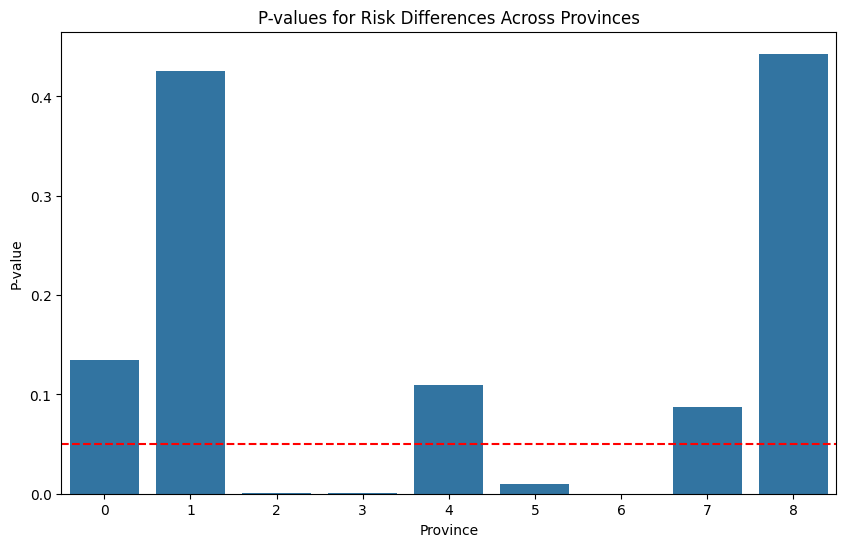

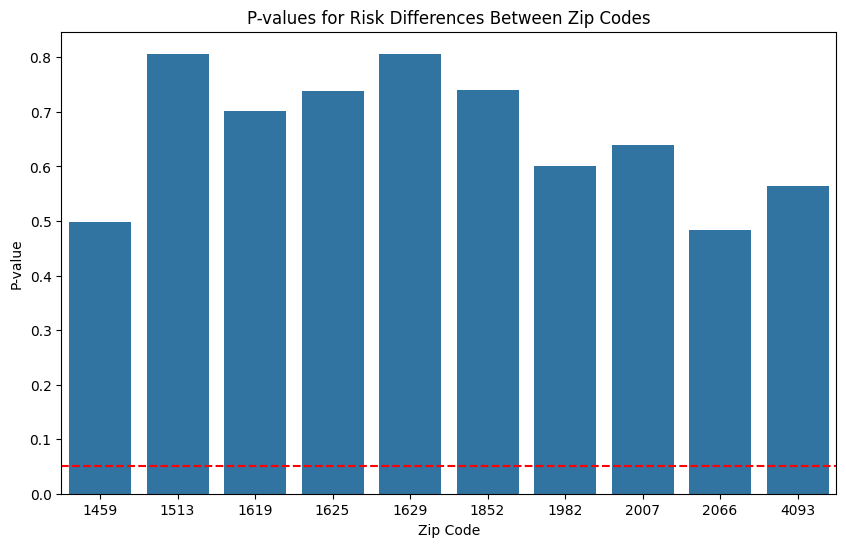

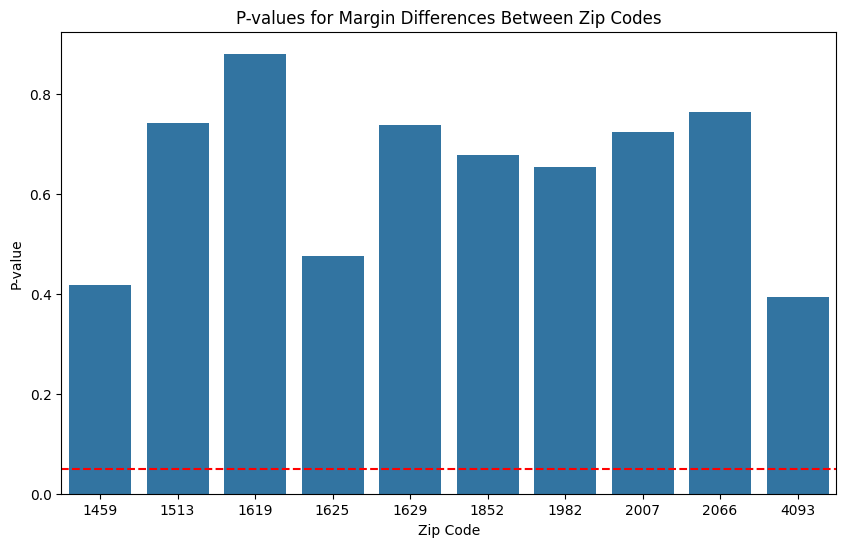

In [13]:
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Convert boolean columns to integers (0 and 1)
boolean_columns = df.select_dtypes(include=['bool']).columns
for column in boolean_columns:
    df[column] = df[column].astype(int)

# Identify numerical columns (excluding 'UnderwrittenCoverID', 'PolicyID', 'TotalClaims', and 'TotalPremium')
excluded_columns = ['UnderwrittenCoverID', 'PolicyID', 'TotalClaims', 'TotalPremium']
numerical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in excluded_columns]

# Identify remaining categorical columns that are still of object type
remaining_categorical_columns = df.select_dtypes(include=['object']).columns

# Perform label encoding for each remaining categorical column
label_encoders = {}
for column in remaining_categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Convert to string in case of mixed types
    label_encoders[column] = le

# # Handle 'Gender' column separately
# gender_mapping = {'Male': 1, 'Female': 0, 'Not specified': 3}
# df['Gender'] = df['Gender'].map(gender_mapping)

# # Print label encodings for 'Gender'
# print(f"Label encoding for column 'Gender':")
# for gender, encoded_value in gender_mapping.items():
#     print(f"{gender} -> {encoded_value}")

# Verify data types
print(df.dtypes)

# Fix target values
target_columns = ['TotalPremium', 'TotalClaims', 'Gender']  # Include 'Gender' column
df = df[['Province', 'PostalCode'] + target_columns]

# Function to handle t-tests and manage warnings
def safe_ttest(group_a, group_b):
    # Suppress warnings
    with np.errstate(invalid='ignore'):
        t_stat, p_value = stats.ttest_ind(group_a, group_b, nan_policy='omit')
    return t_stat, p_value

# Risk differences across provinces
provinces = df['Province'].unique()
print("Risk differences across provinces:")
for province in provinces:
    group_a = df[df['Province'] == province]['TotalClaims']
    group_b = df[df['Province'] != province]['TotalClaims']
    t_stat, p_value = safe_ttest(group_a, group_b)
    print(f'Province {province}: p-value={p_value}')
    if p_value < 0.05:
        print(f'Reject the null hypothesis for province {province}.')
    else:
        print(f'Accept the null hypothesis for province {province}.')

# Risk differences between zip codes
zipcodes = df['PostalCode'].unique()
print("\nRisk differences between zip codes:")
for zipcode in zipcodes[:10]:  # Just print a few for brevity
    group_a = df[df['PostalCode'] == zipcode]['TotalClaims']
    group_b = df[df['PostalCode'] != zipcode]['TotalClaims']
    t_stat, p_value = safe_ttest(group_a, group_b)
    print(f'Zip Code {zipcode}: p-value={p_value}')
    if p_value < 0.05:
        print(f'Reject the null hypothesis for zip code {zipcode}.')
    else:
        print(f'Accept the null hypothesis for zip code {zipcode}.')

# Margin (profit) differences between zip codes
print("\nMargin (profit) differences between zip codes:")
for zipcode in zipcodes[:10]:  # Just print a few for brevity
    group_a = df[df['PostalCode'] == zipcode]['TotalPremium'] - df[df['PostalCode'] == zipcode]['TotalClaims']
    group_b = df[df['PostalCode'] != zipcode]['TotalPremium'] - df[df['PostalCode'] != zipcode]['TotalClaims']
    t_stat, p_value = safe_ttest(group_a, group_b)
    print(f'Margin difference for zip code {zipcode}: p-value={p_value}')
    if p_value < 0.05:
        print(f'Reject the null hypothesis for margin difference in zip code {zipcode}.')
    else:
        print(f'Accept the null hypothesis for margin difference in zip code {zipcode}.')

# Risk differences between Women and Men
print("\nRisk differences between Women and Men:")
group_women = df[df['Gender'] == 0]['TotalClaims']  # Assuming 0 is Female
group_men = df[df['Gender'] == 1]['TotalClaims']    # Assuming 1 is Male
t_stat, p_value = safe_ttest(group_women, group_men)
print(f'Gender risk difference: p-value={p_value}')
if p_value < 0.05:
    print('Reject the null hypothesis for gender risk difference.')
else:
    print('Accept the null hypothesis for gender risk difference.')

# Visualize p-values for provinces
provinces_p_values = [safe_ttest(df[df['Province'] == province]['TotalClaims'], df[df['Province'] != province]['TotalClaims'])[1] for province in provinces]
plt.figure(figsize=(10, 6))
sns.barplot(x=provinces, y=provinces_p_values)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Risk Differences Across Provinces')
plt.xlabel('Province')
plt.ylabel('P-value')
plt.show()

# Visualize p-values for zip codes
zipcodes_p_values = [safe_ttest(df[df['PostalCode'] == zipcode]['TotalClaims'], df[df['PostalCode'] != zipcode]['TotalClaims'])[1] for zipcode in zipcodes[:10]]
plt.figure(figsize=(10, 6))
sns.barplot(x=zipcodes[:10], y=zipcodes_p_values)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Risk Differences Between Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('P-value')
plt.show()

# Visualize p-values for margin differences between zip codes
margins_p_values = [safe_ttest(df[df['PostalCode'] == zipcode]['TotalPremium'] - df[df['PostalCode'] == zipcode]['TotalClaims'], df[df['PostalCode'] != zipcode]['TotalPremium'] - df[df['PostalCode'] != zipcode]['TotalClaims'])[1] for zipcode in zipcodes[:10]]
plt.figure(figsize=(10, 6))
sns.barplot(x=zipcodes[:10], y=margins_p_values)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Margin Differences Between Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('P-value')
plt.show()


In [28]:
print(df.head())  # Print the first few rows of the DataFrame
print(df['Gender'].value_counts())  # Check the distribution of values in the 'Gender' column


   Province  PostalCode  TotalPremium  TotalClaims  Gender
0         2        1459     21.929825          0.0       2
1         2        1459     21.929825          0.0       2
2         2        1459      0.000000          0.0       2
3         2        1459    512.848070          0.0       2
4         2        1459      0.000000          0.0       2
Gender
2    940990
1     42817
3      9536
0      6755
Name: count, dtype: int64


In [20]:
gender_values = df['Gender'].value_counts()
print("Unique values of 'Gender' column:")
print(gender_values)
gender_values

Unique values of 'Gender' column:
Gender
2    940990
1     42817
3      9536
0      6755
Name: count, dtype: int64


Gender
2    940990
1     42817
3      9536
0      6755
Name: count, dtype: int64